In [1]:
import zarr
import dask.array as da
import matplotlib.pyplot as plt
from skimage.transform import pyramid_gaussian
import os
import napari
from zarr_tools import convert
import tifffile as tf
from droplet_growth import register as r
import numpy as np

In [3]:
def convert2zarr(path, chunksize=None, nzooms=4):
    img = aicsimageio.imread_dask(path)
    print(img)
    if chunksize is not None:
        img  = img.rechunk(chunksize)
        print("rechunk",img)
    baseurl = path.replace(path.split('.')[-1], "zarr")
    print(baseurl)
    store = zarr.DirectoryStore(baseurl)
    grp = zarr.group(store)
    print("start writing base datset")
    img.to_zarr(url=os.path.join(baseurl, '0'))
    datasets = [{'path':'0'},]
    
    for i in range(nzooms-1):
        j = i + 1
        print(f"Start writing {j} dataset (bin {2**j})")
        img = img[:,:,:,::2,::2]
        img.to_zarr(url=os.path.join(baseurl, j))
        datasets.append({'path': f'{j}'})  

    grp.attrs['multiscales'] = {
        "multiscales": [
            {
                "datasets": datasets,
                "name": os.path.basename(path),
                "type": "skip",
                "version": "0.1"
            },

        ]
    }
    

In [5]:
img = aicsimageio.imread_dask('Y:/Gustave/Peixoto/image_1/210309_5_Cut.tif')
img

Failed to parse XML for the provided file.
not well-formed (invalid token): line 1, column 6
C:\Users\nikon\miniconda3\envs\nd2\lib\site-packages\dask\array\core.py:1519: RuntimeWarning: overflow encountered in long_scalars
  cbytes = format_bytes(np.prod(self.chunksize) * self.dtype.itemsize)


dask.array<transpose, shape=(1, 3, 156, 3900, 2948), dtype=uint16, chunksize=(1, 1, 156, 3900, 2948), chunktype=numpy.ndarray>

In [6]:
img = aicsimageio.imread_dask('Y:/Lena/Data/20220111-MIC-resistant/timelapse-30min/0ng-TRITC-19h.nd2')

In [4]:
convert2zarr(
    'Y:/Lena/Data/20220111-MIC-resistant/timelapse-30min/0ng-TRITC-19h.nd2',
    chunksize=(1,1,25,512,512)
)

dask.array<transpose, shape=(39, 1, 25, 7383, 22392), dtype=uint16, chunksize=(1, 1, 1, 7383, 22392), chunktype=numpy.ndarray>
rechunk dask.array<rechunk-merge, shape=(39, 1, 25, 7383, 22392), dtype=uint16, chunksize=(1, 1, 25, 512, 512), chunktype=numpy.ndarray>
Y:/Lena/Data/20220111-MIC-resistant/timelapse-30min/0ng-TRITC-19h.zarr
start writing base datset
Start writing 1 dataset (bin 2)


TypeError: join() argument must be str, bytes, or os.PathLike object, not 'int'

In [11]:
img

'dask.array<transpose, shape=(39, 1, 25, 7383, 22392), dtype=uint16, chunksize=(1, 1, 1, 7383, 22392), chunktype=numpy.ndarray>'

In [16]:
img = aicsimageio.AICSImage("Y:/Lena/Data/20211207-control-timelapse/00ng-TRITC_30min.nd2")

In [ ]:
v = napari.Viewer()

In [ ]:
tmp = tf.imread("/home/aaristov/Anchor/Lena/Data/20210518_control/template_bin16_bf_mask.tif")[0][::2,::2]

In [ ]:
path = '/home/aaristov/Anchor/Andrey/Data/20220331-test_ST/24hh-4-samples-2d#1-4.zarr/5'
data = da.from_zarr(path)
data

<tifffile.TiffFile 'TRITC-30min-Z-1…axIP_XY1.ome.tif'> OME series expected 1 frames, got 29


dask.array<transpose, shape=(1, 1, 1, 7019, 22259), dtype=uint16, chunksize=(1, 1, 1, 7019, 22259), chunktype=numpy.ndarray>

In [9]:
v.add_image(data, channel_axis=1)

'.'

In [5]:
img1  = img.rechunk((1,1,156,128,128))

In [7]:
bf_data = data[:,0].compute()

In [19]:
img

dask.array<from-zarr, shape=(1, 3, 156, 3900, 2948), dtype=uint16, chunksize=(1, 1, 156, 128, 128), chunktype=numpy.ndarray>

In [35]:
img = dask.array.from_zarr(url='/home/aaristov/Downloads/Gustave_Peixoto_image_1_210309_5_Cut_1.zarr')

In [36]:
img

dask.array<from-zarr, shape=(1, 3, 156, 3900, 2948), dtype=uint16, chunksize=(1, 1, 156, 128, 128), chunktype=numpy.ndarray>

(3900, 2948)
0 4095


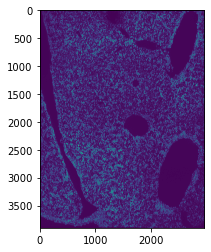

In [43]:
def prev(img):
    a = img[0,0,1,].compute()

    print(a.shape)

    print(a.min(), a.max())

    plt.imshow(a)

prev(img)

(1950, 1474)
0 4095


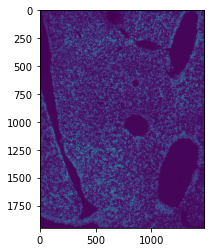

In [45]:
tr = [r.get_transform(bf[::(i:=2),::i], tmp[::i,::i], ) for bf in bf_data]

(975, 737)
0 4095


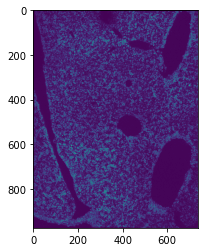

In [46]:
v.add_image(data[:,0],channel_axis=0, rotate=[t['angle'] for t in tr], translate=[t['tvec']*2 for t in tr])

(488, 369)
0 4095


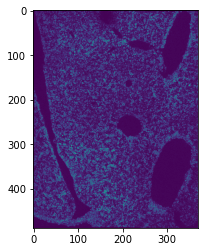

In [47]:
img8 = img4[:,:,:,::2,::2]
prev(img8)

In [54]:
baseurl = '/home/aaristov/Downloads/Gustave_Peixoto_image_1_210309_5_Cut_2.zarr'

In [58]:
store = zarr.DirectoryStore('/home/aaristov/Downloads/Gustave_Peixoto_image_1_210309_5_Cut_2.zarr')

grp = zarr.group(store)

grp.attrs['multiscales'] = {
    "multiscales": [
        {
            "datasets": [
                {
                    "path": "0"
                },
                {
                    "path": "1"
                },
                {
                    "path": "2"
                },
                {
                    "path": "3"
                },
                {
                    "path": "4"
                }
            ],
            "name": "gaussian",
            "type": "gaussian",
            "version": "0.1"
        },
        
    ]
}

In [ ]:
grp.

In [56]:
img.to_zarr(path.join(baseurl, '0'))

In [57]:
img2.to_zarr(path.join(baseurl, '1'))
img4.to_zarr(path.join(baseurl, '2'))
img8.to_zarr(path.join(baseurl, '3'))


In [6]:
import napari